Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


## Test P1 (2021/1): time and frequency domain analysis of sdof systems

---

**NAME:** <br/>
**CARD:** 


#### Instruções

1. Entregar a resolução da prova em arquivo único, com no máximo 10Mb, até as 17h de hoje, 26 de abril de 2021.
2. Recomenda-se verificar atentamente se todas as folhas da resolução foram incluídas no arquivo gerado, pois não serão aceitas entregas posteriores.
3. Na primeira folha do arquivo deve constar claramente o NOME e o cartão de MATRÍCULA.
4. A consulta ao material de estudo e o uso do computador para cálculos são LIVRES.
5. A prova deve ser realizada INDIVIDUALMENTE, sem recorrer ao auxílio de colegas ou outras pessoas! Caso se verifique o descumprimento desta regra, todos os envolvidos na fraude terão a nota da prova zerada.


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt

from MRPy import *


## Questão 1

Um adepto do "bungee jump" se atira de uma plataforma no instante $t=0$ preso ao cabo flexível de comportamento elástico linear. O arrasto aerodinâmico pode ser desconsiderado ao longo da queda. Demais dados do problema são:

* A massa do saltador é $70{\rm kg}$.
* O cabo distensionado tem comprimento de $20{\rm m}$.
* A rigidez axial do cabo é $70{\rm N/m}$ na tração e nula na compressão.
* O grau de liberdade considerado, $u(t)$, é o deslocamento vertical a partir da superfície da plataforma, sentido positivo para baixo.
* A aceleração da gravidade no local é $9.81{\rm m/s}^2$.

<img src="PEC00025A_211_P1Q1.jpg" alt="Question 1" width="360px"/>


Pergunta-se:

1. Qual a frequência natural de vibração livre do sistema saltador-cabo (com o cabo em carga)?
2. Qual a maior deslocamento atingido durante o salto, $u_{\rm max}$? Em que instante de tempo, $t$, este deslocamento máximo ocorre?
3. Qual a maior aceleração total à qual o saltador é submetido?
4. Qual a maior força de tração à qual o cabo será submetido (e que portanto será aplicada à perna do saltador)?
5. Se o amortecimento histerético do cabo é 3% (razão do crítico), quantos ciclos de oscilação vertical ocorrerão antes que a  amplitude (da parte flutuante) seja reduzida à 1/3 (um terço) de seu valor máximo? 


In [2]:
m1 =  70.             # massa da pessoa em (kg)
L1 =  20.             # comprimento do cabo sem tensão (m)
k1 =  70.             # rigidez axial do cabo (N/m)
g  =  9.81            # gravidade local (m/s2)
zt =  0.03            # damping ratio of critical (non dim)


__Questão 1.1:__ aplicação direta da fórmula da frequência de um sistema massa-mola:

$$ f_{\rm n} = \frac{1}{2\pi} \sqrt{\frac{k}{m}} $$


In [3]:
wn = np.sqrt(k1/m1)
fn = wn/(2*np.pi)

print('Frequência natural do sistema saltador-cabo é aproximadamente {0:3.2f}rad/s = {1:4.3f}Hz.\n'.format(wn, fn))


Frequência natural do sistema saltador-cabo é aproximadamente 1.00rad/s = 0.159Hz.



__Questão 1.2:__ pode ser resolvida por balanço de energia, ou considerando-se a resposta a condições iniciais de velocidade (da massa) superpostas à uma carga impulsiva a partir do deslocamento $u(t_0) = 20$m.

A velocidade do saltador no instante que o cabo começa a ser tensionado é dada por:

$$ v_0 = \sqrt{2gh} = \sqrt{2 \cdot 20 \cdot 9.81} \approx 19.81{\rm m/s}$$

Já o instante em que o tensionamento do cabo tem início é dado por:

$$ t_0 = \sqrt{\frac{2h}{g}} = \sqrt{\frac{2 \cdot 20}{9.81}} \approx 2.02{\rm s}$$

A amplitude total do delocamento é a soma da amplitude devida à velocidade inicial com o deslocamento 
devido à carga impulsiva. 
O formato retangular da carga impulsiva implica que o fator de amplificação dinâmica, $A$, da resposta
estática, $u_{\rm est}$, é igual a 2. Portanto:

$$ u_{\rm max} = u(t_0) + \frac{v_0}{\omega_{\rm n}} + A \, u_{\rm est} $$

Substituindo valores:

$$ u_{\rm max} = 20 + \frac{19.81}{1.00} + 2 \cdot \frac{70 \cdot 9.81}{70} 
               = 20 +  19.81 + 19.62 = 59.43{\rm m}$$

contados a partir da plataforma, ou 39.43m a partir dos 20m de cabo. 

O tempo até esse deslocamento máximo é aproximadamente metade do período natural de vibração livre, 
contado após o instante $t_0$ em que o cabo começa a ser tensionado. Podemos dizer que o tempo total 
até o instante em que $ u_{\rm max} $ é atingido pode então ser calculado como:

$$ t_{\rm max} = t_0 + \frac{T_{\rm n}}{4} \approx 2.02 + \frac{1}{4 \cdot 0.159} \approx 3.6{\rm s} $$

O código abaixo apresenta esses resultados na forma de uma simulação. Contudo, o tempo $t_0$ é definido como sendo
zero para poder aplicar a velocidade inicial na função que integra por Duhamel. 


Pico de deslocamento é 30.4m.
Tempo até o pico é  4.0s.



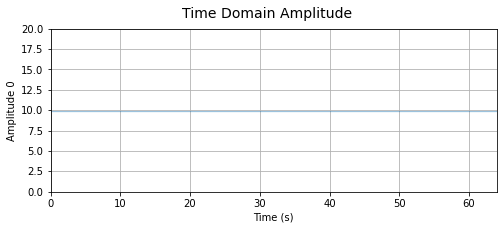

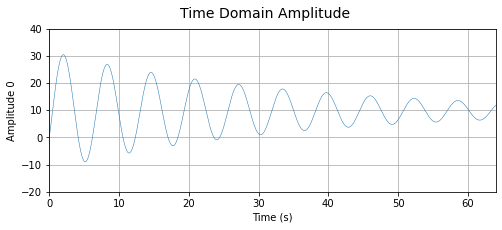

In [4]:
Td = 64
N  = 4096

t  = np.linspace(0, Td, N)
F  = MRPy(g*np.ones(t.shape), Td=Td)                          # força dividida pela massa do sistema

u  = F.sdof_Duhamel(fn, zt, V0=19.81)                         # solução por Duhamel

F.plot_time(fig=1, axis_t=[0, Td,   0, 20], figsize=(8,3));   # peso do saltador aplicado em t = 0s
u.plot_time(fig=2, axis_t=[0, Td, -20, 40], figsize=(8,3));   # resposta dinâmica

imax = np.argmax(u[0])                                        # posição do pico de resposta

print('Pico de deslocamento é {0:4.1f}m.'.format(u[0].max()))
print('Tempo até o pico é {0:4.1f}s.\n'.format(t[imax]+2.02))


O resultado numérico mostra que a solução não é tão simples quanto foi considerada na estimativa manual. 
O pico de deslocamento, descontado os 20m de cabo, deveria ser 39.43m. No entanto, o cálculo numérico
resultou num valor um pouco acima de 30m. 


__Questão 1.3:__ A aceleração é a segunda derivada da resposta em deslocamento. Considerando uma resposta harmônica (parte
flutuante) com amplitude máxima 30.4m, amplitude média 9.81m, e frequência 1rad/s, isso dá uma aceleração:

$$ a_{\rm max} = \omega^2_{\rm n} \, u_{\rm max} = 1^2 \cdot (30.4 - 9.81) = 20.6{\rm m/s^2}$$

Portanto o saltador será submetido a aproximadamente 2g de aceleração. 
Este resultado também pode ser comprovado por derivação numérica:


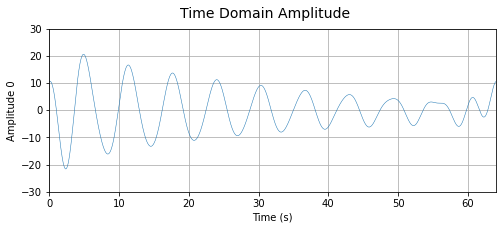

In [5]:
a = u.zero_mean().differentiate(band=[0, 0.3]).differentiate(band=[0,3])

a.plot_time(fig=3, axis_t=[0, Td, -30, 30], figsize=(8,3));


__Questão 1.4:__ A maior tração no cabo é simplesmente o maior elongamento vezes a constante elástica:

$$ T_{\rm max} = u_{\rm max} \, k \approx 30.4 \cdot 70 = 2.13{\rm kN} $$

Isso corresponde a aproximadamente 3 vezes o peso do saltador!


__Questão 1.5:__ Este cálculo pode ser feito utilizando-se a expressão de estimativa de amortecimento por decremento
logarítmico. Considerando-se um decaimento de 1/3 da amplitude inicial (parte flutuante apenas) tem-se:

$$ \zeta = \frac{\ln (3 \, / \, 1)}{2 \pi \,N} = 3\% $$

Portanto $N \approx 6$ ciclos. Este resultado pode ser conferido no gráfico do deslocamento simulado na solução
da questão 1.2, correspondendo ao pico que ocorre próximo aos 40 segundos desse gráfico.


## Questão 2

Uma placa de trânsito é sujeita à força dinâmica do vento (na própria direção do vento). 
A placa pode ser entendida como uma viga engastada na extremidade inferior e livre na extremidade superior. 
O poste que sustenta a placa tem seção tubular. Demais dados do problema são

* A massa oscilante da placa, já considerando uma parte do poste, é $50{\rm kg}$.
* O comprimento livre do poste é $4{\rm m}$.
* O amortecimento do sistema placa-poste é 1% (razão do crítico).
* O grau de liberdade considerado, $u(t)$, é o deslocamento horizontal do centro da placa na direção do vento, medido a partir da posição sem vento.
* O poste tem diâmetro externo $40{\rm mm}$ e diâmetro interno  $35{\rm mm}$ (considerar seção constante).
* O módulo de rigidez do aço do poste é $2.05\times 10^{11} {\rm N/m}^2$.
* A flexão no poste ocorre dentro do regime linear elástico.
* O valor médio da força do vento é $100{\rm N}$ e o valor r.m.s. é $10{\rm N}$.
* A parte flutuante da força do vento pode ser considerada um ruído branco em banda, de 0 a 10Hz (densidade espectral constante neste intervalo e zero fora dele).

<img src="PEC00025A_211_P1Q2.jpg" alt="Question 2" width="240px"/>  


Pergunta-se:

1. Qual a frequência natural do sistema?
2. Qual o deslocamento médio da placa?
3. Qual o valor r.m.s. do deslocamento da placa?
4. Qual o pico do deslocamento da placa esperado para um intervalo de 10 minutos?
5. Quantas oscilações a placa sofrerá em média neste mesmo intervalo?


In [6]:
m2 =  50.             # massa da placa e parte do poste (kg)
L2 =  4.              # comprimento do poste do engaste até o CG da placa (m)
zt =  0.01            # amortecimento (razão do crítico)
E  =  2.05e11         # modulo de elasticidade do aço (N/m2)

De =  0.040           # diâmetro interno do poste
Di =  0.035           # diâmetro externo do poste


__Questão 2.1:__ Inicialmente precisamos calcular a rigidez à flexão do poste:

$$ EI = E \, \frac{\pi (d_{\rm ext}^4 - d_{\rm int}^4)}{64} \approx 10660{\rm Nm^2}$$

A rigidez vista de um grau de liberdade correspondente ao deslocamento transversal no topo do poste é dada por:

$$ k = \frac{3EI}{L^3} \approx 499.7{\rm N/m}$$

Considerando-se a massa da placa dada e desprezando-se a massa do poste tem-se a frequência natural do sistema:

$$ f_{\rm n} = \frac{1}{2\pi} \sqrt{\frac{k}{m}} $$

Observe que a massa do poste é da ordem de 10% da massa da placa e portanto está sendo desprezada.


In [7]:
EI = E*np.pi*(De**4 - Di**4)/64
k2 = 3*EI/(L2**3)

wn = np.sqrt(k2/m2)
fn = wn/(2*np.pi)

print('Frequência natural do sistema placa-poste é aproximadamente {0:3.2f}rad/s = {1:4.3f}Hz.\n'.format(wn, fn))


Frequência natural do sistema placa-poste é aproximadamente 3.16rad/s = 0.503Hz.



__Questão 2.2:__ O deslocamento médio da placa, na direção do vento, depende da força de arrasto média:

$$ \bar{u} = \frac{\bar{F}}{k} = \frac{100}{499.7} \approx 20{\rm cm}$$


__Questão 2.3:__ Para o cálculo da resposta dinâmica é necessário levar o problema para o domínio da frequência, 
de tal forma que o espectro da parte flutuante da resposta em deslocamento, $S_U(\omega)$, é dada por:

$$ S_U(\omega) = \lvert H(\omega) \rvert^2 \, S_F(\omega) $$

onde $\left| H(\omega) \right|^2$ é a função de admitância mecânica:

$$ \lvert H(\omega) \rvert^2 = \frac{1}{k^2} \; \left[ \frac{1}{(1 - \beta^2)^2 + (2\zeta\beta)^2} \right]$$

e $S_F(\omega)$ é o espectro da força do vento.
A seguir vamos construir estas funções numericamente para efetuar o cálculo.


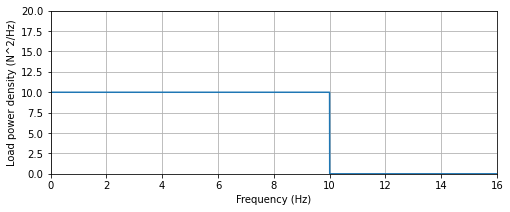

In [8]:
fs =  32
f  =  np.linspace(0, fs/2, 9601)  # domínio da frequência
SF =  np.zeros(f.shape)           # aloca espaço para o espectro da força do vento

kF = (f <= 10)
SF[kF] = 10.                    # ruído branco de 0 a 10Hz, r.m.s. é 10N

plt.figure(4, figsize=(8,3))
plt.plot(f, SF)
plt.grid(True)
plt.axis([0, 16, 0, 20])
plt.xlabel('Frequency (Hz)');
plt.ylabel('Load power density (N^2/Hz)');


A admitância mecânica pode ser definida como uma "função lambda":

In [9]:
H2 = lambda w: 1/( (1 - (w/wn)**2)**2 + (2*zt*(w/wn))**2 )/(k2**2)


Podemos calcular o espectro da resposta em deslocamento como:


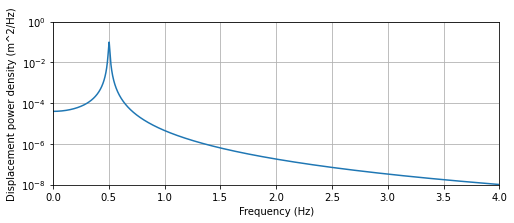

In [10]:
SU = H2(2*np.pi*f)*SF

plt.figure(5, figsize=(8,3))
plt.semilogy(f, SU)
plt.grid(True)
plt.axis([0, 4, 1e-8, 1e0])
plt.xlabel('Frequency (Hz)');
plt.ylabel('Displacement power density (m^2/Hz)');


O valor r.m.s. do deslocamento, $\sigma_U$, pode ser calculado integrando-se a função acima:

In [11]:
sU = np.sqrt(np.trapz(SU[kF], f[kF]))

print('Valor r.m.s. da parte flutuante da resposta em deslocamento é {0:3.2f}cm.\n'.format(100*sU))


Valor r.m.s. da parte flutuante da resposta em deslocamento é 3.98cm.



__Questão 2.4:__ Considerando-se a "fórmula de Davenport" para processos gaussianos banda larga, 
podemos estimar o fator de pico, $g$, a partir dos momentos da densidade espectral:

$$g = \sqrt{2 \ln (\nu_0 T)} + \frac{0.5772}{\sqrt{2 \ln (\nu_0 T)}}$$

onde $T$ é o tempo de observação, adotado como 600s (10 minutos) na NBR-6123, e $\nu_0$ é a taxa de cruzamento 
do nível zero para o positivo (_zero upcrossing rate_), calculada a partir do espectro como:

$$ \nu_0 = \sqrt{\frac{\int_0^\infty{f^2 S_{U}(f) \; df}}
                    {\int_0^\infty{    S_{U}(f) \; df}}} $$

Esses cálculos podem ser feitos com o auxílio do Python:

In [12]:
sU2 = np.trapz(            SU[kF], f[kF])
sU4 = np.trapz(f[kF]*f[kF]*SU[kF], f[kF])

nu   = np.sqrt(sU4/sU2)
lnu  = np.sqrt(2*np.log(600*nu))
g    = lnu + 0.5772/lnu

print(' Zero upcrossing rate: {0:4.3f}Hz'.format(nu))
print(' Peak factor:          {0:4.3f}  '.format(g ))


 Zero upcrossing rate: 0.503Hz
 Peak factor:          3.550  


Como esperado, a taxa de cruzamento do nível zero é uma frequência muito próxima à frequência natural do sistema
sujeito a um processo banda larga. O deslocamento máximo em 10 minutos portanto é:

$$ u_{\rm max} = \bar{u} + g \, \sigma_U = 0.2 + 3.55 \cdot 0.0398 \approx 34.1{\rm cm} $$


__Questão 2.5:__ O número de ciclos que ocorrerão no tempo de 10 minutos, considerada a resposta a um processo banda larga, 
será aproximadamente a taxa de cruzamentos de zero vezes este tempo de observação:

$$ N = \nu_0 \, T = 0.503 \cdot 600 \approx 302\;{\rm ciclos} $$

Todas as questões acima podem ser conferidas por meio de simulação utilizando-se o módulo ``MRPy``, tal como
mostrado a seguir.


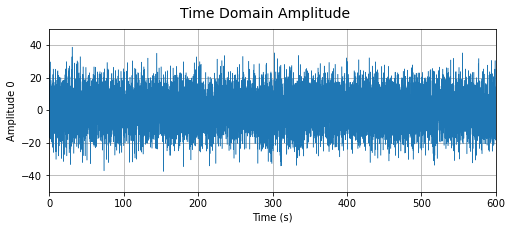

In [13]:
F = MRPy.from_periodogram(SF, fs)

F.plot_time(fig=6, axis_t=[0, 600, -50, 50], figsize=(8,3));


Valor r.m.s. da parte flutuante da resposta em deslocamento é 3.98cm.



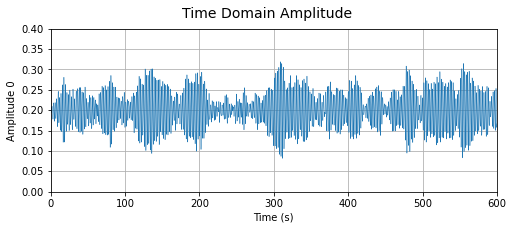

In [14]:
u = F.sdof_Duhamel(fn, zt)/m2 + 0.2

u.plot_time(fig=7, axis_t=[0, 600, 0, 0.4], figsize=(8,3));

print('Valor r.m.s. da parte flutuante da resposta em deslocamento é {0:3.2f}cm.\n'.format(100*u.std()))


Ou seja, uma rápida simulação com a ``MRPy`` aproxima o valor r.m.s. anteriormente calculado. 
O pico previsto também está sendo aproximadamente observado no gráfico acima. 
Sugerimos fazer novas simulações para verificar a repetibilidade desses resultados.
